In [1]:
from IPython.display import Image
%matplotlib inline

## import the data

In [2]:
import pandas as pd

df1 = pd.read_csv('data/input/38bldgs_survey_2013.csv',
#                  index_col='dataid',
                 header='infer',
                 sep=',')

df1.dtypes;

df1.shape

df1.dropna(axis=1,how='all');
# drop the columns where all values are null

df1 = df1.drop_duplicates(subset='dataid', keep='first')

df1.shape

range1 = lambda start, end: range(start, end+1)

list1 = [1] + list(range1(3,4)) + [22, 23, 37, 39, 41, 42, 43, 45, 46] + list(range1(60,67)) + [76] + list(range1(87,101)) \
            + [108, 110, 113, 115, 120, 122, 124, 129, 131, 132, 133] + list(range(135, 168, 2)) + list(range1(174,177)) \
             + [182] 
# list of columns to be dropped due to these columns simply do not make sense       

df1 = df1.drop(df1.columns[list1], axis=1)

df1.shape

pd.set_option('display.max_rows', 200)
# set the max rows can be displayed as 200

list11 = [1,2,3,4,7]
# list of columb to be dropped due to overlap between audits table and survey table

df1 = df1.drop(df1.columns[list11], axis=1)

df1.dropna(axis=1,how='all');
# drop the columns where all values are null

# df1.to_csv('data/test.csv', sep=',')

df1.shape

list12 = list(range1(3,13)) + list(range1(24,45)) + list(range1(49,59)) + list(range1(61,66)) + [73,75] \
           + list(range1(77,81)) + list(range1(99,104))
 
# list of columns to get dummied

df_1 = pd.get_dummies(df1[list12])
# convert the nominal categorical features

df_1.shape
# size of the data framwork with dummy features

df_1.dtypes;

list13 = [14, 15, 46] + list(range1(82,98)) + list(range1(105,108))
# list of column to be converted 

df_11 = df1[list13].apply(pd.to_numeric, errors='coerce')
# convert the ordinal categorical features

df_11.dtypes;

df_11.shape
# size of the data framwork with converted features

df1.dtypes;
# check data types of df1 before converting

list14 = list12 + list13
# get the combined list of the columns that have been dummied and have been converted

df1 = df1.drop(df1.columns[list14], axis=1)
# reduce the dummy and converted columns from the original data framework

df1.shape
# size of the new dataframe 

df1 = pd.concat([df1, df_1], axis=1)

df1 = pd.concat([df1, df_11], axis=1)

df1.shape

df1.dtypes;

df1.head();

df1.fillna(0, inplace=True)

df1.head()

df1.shape

(38, 172)

In [3]:
import pandas as pd

df2 = pd.read_csv('data/input/38bldgs_audits_2013.csv',
#                  index_col='dataid',
                 header='infer',
                 sep=',')

df2.shape

df2.head();

range2 = lambda start, end: range(start, end+1)

list2 = list(range2(1,4)) + [8] + [12, 13] + [19, 20] + [27, 30, 47, 49, 57, 58, 59, 61, 63, 66, 68, 69, 70] + list(range2(74,77))
# list of columns to be dropped     

list2;

df2 = df2.drop(df2.columns[list2], axis=1)

df2.shape

df2.dtypes;

df2.head()

df2.shape

list22 = [6, 7, 8, 51]
# list of column to be get dummied

df_2 = pd.get_dummies(df2[list22])

df_2.head();

df_2.shape

df2 = df2.drop(df2.columns[list22], axis=1)

df2.shape

df2 = pd.concat([df2, df_2], axis=1)

df2.shape

df2.head()

df2.dtypes;

df2.fillna(0, inplace=True)

df2.head();

df2.shape

(38, 67)

In [4]:
df12 = pd.merge(df1, df2, on='dataid', how='left')

df12.shape

df12;

df12.isnull().sum();
# show the number of null values in each column

df12.head();

df12.shape

(38, 238)

In [5]:
import pandas as pd

df1 = pd.read_csv('data/input/38bldgs_electricity_egauage_hours_2014.csv',
#                 index_col= ['dataid','localhour'],
                 index_col= 'dataid',
                 header='infer',
                 sep=',')

df1.shape

df1.dropna(axis=1,how='all');
# drop the columns where all values are null

df1.head();

df1['electricity_consumption'] = df1.sum(axis=1)

df_1 = df1[['localhour', 'electricity_consumption']].copy()

df_1.shape

# df_11 = df_1.reset_index(level='dataid')
# reset the dataid as column instead of index for the sake of join

df_1.head()

import pandas as pd

df2 = pd.read_csv('data/input/weather_hours_2014.csv',
#                index_col='localhour',
                 header='infer',
                 sep=',')

df2.shape

df2.dropna(axis=1,how='all');
# drop the columns where all values are null

df2.median();
df_2 = df2.fillna(df2.median())

df_2.fillna(0, inplace=True)
# set the null value to zero

df_2.shape

# df_22 = df_2.reset_index(level='localhour')
# reset the dataid as column instead of index for the sake of drop duplicate

df_2 = df_2.drop_duplicates(subset='localhour', keep='first');
# drop duplicate tuples based on localhour column

df_2.shape

df_2.head()

df_1 = df_1.reset_index(level='dataid');
# reset the dataid as column instead of index for the sake of join

df_1.head()

df_1['localhour']  = pd.to_datetime(df_1['localhour'])

df_2['localhour']  = pd.to_datetime(df_2['localhour'])

df_a = pd.merge(df_1, df_2, on='localhour', how='left')

df_a.shape

df_a.head()

df_a = df_a.fillna(df_a.median())

df_a.isnull().sum();
# show the number of null values in each column

df_a.shape

(314121, 30)

In [6]:
df = pd.merge(df_a, df12, on='dataid', how='left')

df.shape

df.head()

df  =  df.drop(['summary','precip_type'], 1)

df_reserve = df

df.isnull().sum()
# show the number of null values in each column

df.dtypes;

df.shape

(314121, 265)

## PCA analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df_reserve = df_reserve.drop(['dataid'], axis =1)

df.shape

(314121, 265)

In [9]:
list1 = list(df_2)
# specify the list that needs to be dropped from the analysis

In [10]:
list1.remove('summary')

In [11]:
list1.remove('precip_type')

In [12]:
df_1 = df_reserve.drop(list1, axis =1)

In [13]:
# # list to be added from weather profile
list2 = ['temperature', 'humidity', 'dew_point','visibility','pressure', 'apparent_temperature',
         'wind_speed', 'cloud_cover', 'wind_bearing']

#list2 = ['temperature', 'humidity', 'dew_point', 'apparent_temperature', 'wind_speed', 'cloud_cover']

In [14]:
df_2 = df_reserve[list2]

In [15]:
df_1;

In [16]:
df_2.shape;

In [17]:
# try what will happen if you only use df_1 as data framework
# df = df_1

In [18]:
# # try what will happen of you only use df_2, the weather related factors as framework
# df_1 = df_reserve['electricity_consumption']
# df_2 = df_reserve[list2]
# df = pd.concat([df_1, df_2], axis=1)

In [19]:
df = pd.concat([df_1, df_2], axis=1)
# join the weather profile factors and other factors together

In [20]:
# appoint the top 20 most important feature from EDA and randow forest

list3 = ['electricity_consumption','apparent_temperature','House_Volume_Cubic_Footage__c','residents_13_to_18',
         'ACH50_Calculation__c','house_square_feet','Number_of_Bedrooms__c','irrigation_system_Yes',
         'wind_bearing','humidity','Total_Window_Square_Footage_W__c','temperature','electric_ovenrange_number',
         'Total_Window_Square_Footage_S__c', 'modify_routines_Yes','television_number','cloud_cover','Construction_Year__c',
         'visibility','appliance_hairdryer_daily basis','Attic_Insulation_Secured__c','ceilingfan_number',
         'spend_time_at_home_none_none', 'electricvehicle_number','wind_speed','dew_point']

In [21]:
df  = df[list3]

In [22]:
# # shuffle the columns for the sake of more general PCA

# cols = df.columns.tolist()

# cols = cols[1:]

# from random import shuffle

# shuffle(cols)

# cols

# cols = ['electricity_consumption'] + cols

# df = df[cols]

In [23]:
df

,electricity_consumption,apparent_temperature,House_Volume_Cubic_Footage__c,residents_13_to_18,ACH50_Calculation__c,house_square_feet,Number_of_Bedrooms__c,irrigation_system_Yes,wind_bearing,humidity,...,cloud_cover,Construction_Year__c,visibility,appliance_hairdryer_daily basis,Attic_Insulation_Secured__c,ceilingfan_number,spend_time_at_home_none_none,electricvehicle_number,wind_speed,dew_point
0,4.043500,36.89,21373,1.0,4.52,2047.0,3,1,200.0,0.67,...,0.00,2008,10.00,0,0,5.0,1,1.0,5.00,30.12
1,2.615967,33.79,21373,1.0,4.52,2047.0,3,1,196.0,0.74,...,0.00,2008,9.77,0,0,5.0,1,1.0,5.60,30.46
2,0.846150,35.80,21373,1.0,4.52,2047.0,3,1,191.0,0.77,...,0.00,2008,8.46,0,0,5.0,1,1.0,3.96,31.92
3,0.678233,36.50,21373,1.0,4.52,2047.0,3,1,184.0,0.74,...,0.00,2008,8.89,0,0,5.0,1,1.0,3.11,30.99
4,0.667717,33.86,21373,1.0,4.52,2047.0,3,1,190.0,0.75,...,0.00,2008,9.84,0,0,5.0,1,1.0,5.33,30.66
5,0.669767,34.72,21373,1.0,4.52,2047.0,3,1,176.0,0.73,...,0.00,2008,10.00,0,0,5.0,1,1.0,5.54,30.81
6,1.813783,35.99,21373,1.0,4.52,2047.0,3,1,196.0,0.70,...,0.55,2008,10.00,0,0,5.0,1,1.0,4.67,30.41
7,1.066900,34.70,21373,1.0,4.52,2047.0,3,1,201.0,0.75,...,0.00,2008,9.79,0,0,5.0,1,1.0,4.16,30.52
8,1.450450,34.52,21373,1.0,4.52,2047.0,3,1,199.0,0.73,...,0.00,2008,7.66,0,0,5.0,1,1.0,6.01,31.02
9,0.810550,42.03,21373,1.0,4.52,2047.0,3,1,203.0,0.61,...,0.00,2008,8.26,0,0,5.0,1,1.0,7.30,33.18


In [24]:
df.shape

(314121, 26)

In [25]:
# choose one row every 50 row to randomly get a new dataframe for analysis to reduce the computation load
df = df.iloc[::50, :]

In [26]:
df.shape

(6283, 26)

In [27]:
list(df);

In [28]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

In [29]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

# standarize the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [30]:
# for test purpose

# X_train_std.shape;

# X_train_std[1,1];

# X_train_std[:,1];

# # plt.hist(X_train_std[:,206]);

In [31]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [32]:
# how many eigenvalues are there
eigen_vals.shape

(25,)

In [33]:
eigen_vals

array([  5.40335863e+00,   2.80597921e+00,   2.06849992e+00,
         1.99692297e+00,   1.64314922e+00,   1.50283835e+00,
         1.14489626e+00,   1.02706219e+00,   9.83546376e-01,
         9.22287387e-01,   8.90785368e-01,   7.41056504e-01,
         6.80101989e-01,   4.72562429e-03,   7.63713491e-03,
         5.91913520e-01,   5.16742569e-01,   4.91896979e-01,
         4.20364336e-01,   7.51142069e-02,   1.07459323e-01,
         1.79891254e-01,   2.90683235e-01,   2.45704054e-01,
         2.63069075e-01])

In [34]:
# variance explained ratios of the eigenvalues
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [35]:
var_exp;

In [36]:
cum_var_exp.shape

(25,)

In [37]:
cols = list(df)
# get column list of the data framework

In [38]:
del cols[0]

In [39]:
cols;

In [40]:
var_exp = np.absolute (var_exp)

In [41]:
var_exp;

In [42]:
plot1 = pd.DataFrame(data=var_exp,index=cols)

plot1;

plot1 = plot1.transpose()

In [43]:
plot1

,apparent_temperature,House_Volume_Cubic_Footage__c,residents_13_to_18,ACH50_Calculation__c,house_square_feet,Number_of_Bedrooms__c,irrigation_system_Yes,wind_bearing,humidity,Total_Window_Square_Footage_W__c,...,cloud_cover,Construction_Year__c,visibility,appliance_hairdryer_daily basis,Attic_Insulation_Secured__c,ceilingfan_number,spend_time_at_home_none_none,electricvehicle_number,wind_speed,dew_point
0,0.216085,0.112214,0.082721,0.079859,0.065711,0.0601,0.045785,0.041073,0.039333,0.036883,...,0.019671,0.016811,0.011625,0.01052,0.009826,0.007194,0.004297,0.003004,0.000305,0.000189


In [44]:
plot = plot1.sort_values(by=0, ascending=False, axis=1)
# sort the first row by means of ascending

In [45]:
# save the csv file that ranks the feature importances for pca
plot.to_csv('data/output/feature_importances_PCA.csv')

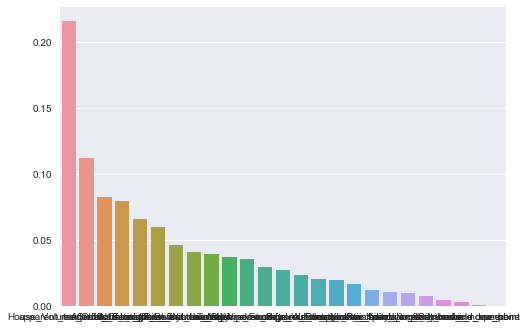

In [46]:
ax = sns.barplot(data=plot)

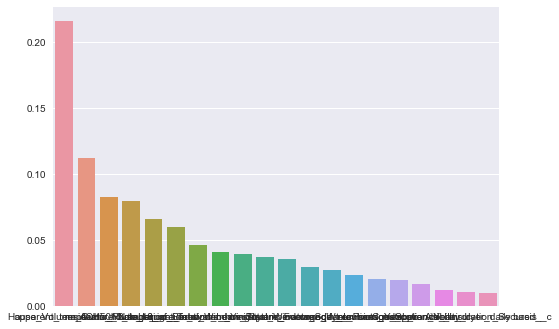

In [47]:
plota = plot.ix[:,0:20]
# select the first 20 columns in the table (five factors that have largest PCA
# note that the first column should be excluded because it is itself

# save the csv file that have top 20 important features for random forest
plota.to_csv('data/output/top20_important_feature_PCA.csv')

ax = sns.barplot(data=plota)
# plot the first 20 columns that are positively related to y

In [48]:
plota

,apparent_temperature,House_Volume_Cubic_Footage__c,residents_13_to_18,ACH50_Calculation__c,house_square_feet,Number_of_Bedrooms__c,irrigation_system_Yes,wind_bearing,humidity,Total_Window_Square_Footage_W__c,temperature,electric_ovenrange_number,Total_Window_Square_Footage_S__c,modify_routines_Yes,television_number,cloud_cover,Construction_Year__c,visibility,appliance_hairdryer_daily basis,Attic_Insulation_Secured__c
0,0.216085,0.112214,0.082721,0.079859,0.065711,0.0601,0.045785,0.041073,0.039333,0.036883,0.035623,0.029636,0.027198,0.023671,0.020665,0.019671,0.016811,0.011625,0.01052,0.009826


## feature transformation



In [49]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

In [50]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [51]:
eigen_pairs;

In [52]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis],
               eigen_pairs[4][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.01708587  0.58885022 -0.00741855  0.04315428 -0.0137767 ]
 [ 0.36968792  0.00107952 -0.0593566  -0.01051601 -0.12532062]
 [ 0.24161791 -0.00628882  0.12005797 -0.01734425  0.03030116]
 [-0.22406533  0.00678979 -0.1719819   0.01064842  0.14478651]
 [ 0.35876128 -0.0047856   0.01674781 -0.02418614 -0.15100215]
 [ 0.33964282 -0.0043874   0.03679329 -0.00084462 -0.07640326]
 [ 0.27900536 -0.01934854  0.16914076 -0.0010544  -0.12860735]
 [-0.00574121 -0.1257011   0.00863452  0.12319177  0.00832948]
 [-0.00426786 -0.07012033 -0.03555835 -0.60491806  0.05476415]
 [-0.0168686  -0.0268274  -0.57659948  0.02976271 -0.06689141]
 [ 0.01605148  0.58833679 -0.0055693   0.05512844 -0.01789617]
 [ 0.30634444 -0.01388774 -0.01404714 -0.02957401 -0.0767754 ]
 [ 0.12997972 -0.00809525 -0.22508768 -0.01592071 -0.28291178]
 [ 0.03723806 -0.00851389  0.03373164 -0.05298972 -0.47663848]
 [ 0.21163948 -0.01242686 -0.19606057  0.02941472  0.41101861]
 [-0.0049025  -0.02511866 -0.03829999 -0.453

In [53]:
w.shape

(25, 5)

## scatter plot in original feature space and transformed feature space

### plot in original featur space

In [64]:
# get the list of plota dataframe, which are the top 20 most important features influencing y
cols_a = list(plota)

In [65]:
cols_a = cols_a[0:5]
# only select the top 5 most important component

In [66]:
# in order to get clearer figure, we reduce the feature number to five
cols_aa =  ['electricity_consumption'] + cols_a

In [67]:
cols_aa

['electricity_consumption',
 'apparent_temperature',
 'House_Volume_Cubic_Footage__c',
 'residents_13_to_18',
 'ACH50_Calculation__c',
 'house_square_feet']

In [68]:
cols_a

['apparent_temperature',
 'House_Volume_Cubic_Footage__c',
 'residents_13_to_18',
 'ACH50_Calculation__c',
 'house_square_feet']

In [69]:
df;

In [70]:
df_ori = df[cols_aa]

In [71]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X1, y1 = df_ori.iloc[:, 1:].values, df_ori.iloc[:, 0].values

X1_train, X1_test, y1_train, y1_test = \
    train_test_split(X1, y1, test_size=0.3, random_state=0)

# standarize the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X1_train_std = sc.fit_transform(X1_train)
X1_test_std = sc.transform(X1_test)

In [72]:
plot_ori_x = pd.DataFrame(X1_train_std,columns =cols_a)

plot_ori_y = pd.DataFrame(y1_train,columns =['electricity_consumption'])

plot_ori_x; 

plot_ori_y;

plot_ori = pd.concat([plot_ori_x, plot_ori_y], axis=1)

plot_ori;

In [75]:
plot_ori.columns=['apparent temperature','house volume','13 to 18 residents','ACH50 calculation','house square feet','electricity consumption']

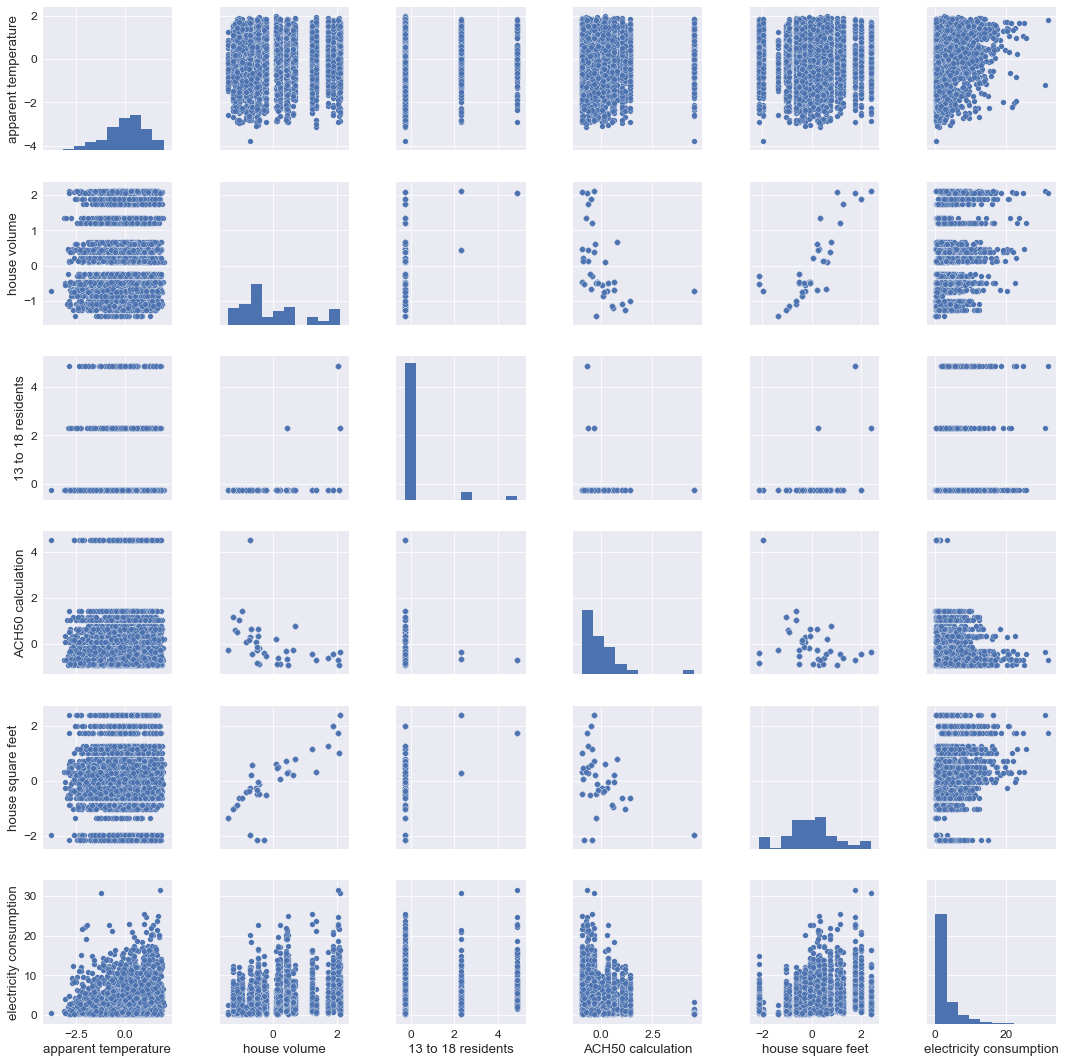

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

sns.set_context("paper",font_scale=1.5)

sns.pairplot(plot_ori, size=2.5)

plt.tight_layout()

plt.savefig('figures/scatter_top5_importances_in_original_space.png', dpi=300)
# plt.show()

### plot in PCA feature space

In [80]:
X_train_std.shape

(4398, 25)

In [81]:
X_train_pca = X_train_std.dot(w)

X_train_pca.shape;

X_train_pca = np.absolute (X_train_pca)

plot_pca_x = pd.DataFrame(X_train_pca,columns = ['PC1','PC2','PC3','PC4','PC5'])

plot_pca_x;

plot_pca_y = pd.DataFrame(y1_train,columns =['electricity_consumption'])

plot_pca_y;

plot_pca = pd.concat([plot_pca_x, plot_pca_y], axis=1)

plot_pca;

In [82]:
plot_pca

,PC1,PC2,PC3,PC4,PC5,electricity_consumption
0,2.869119,1.609428,0.425704,0.601773,0.544898,6.855617
1,1.092514,2.267120,0.946998,0.304089,0.183762,6.470600
2,1.727702,1.115205,1.074008,1.635831,1.424060,6.351600
3,4.754986,1.095507,0.322820,0.824465,2.407614,7.662100
4,0.663594,2.091819,0.640516,0.811417,1.758790,1.562867
5,2.834500,0.061053,0.461099,0.150450,0.640742,12.633550
6,2.724728,0.245701,0.458108,1.191084,0.028299,0.353433
7,1.144962,0.964148,0.981558,0.597097,0.278755,0.549783
8,0.679638,1.730442,0.568987,0.309799,1.852978,0.858183
9,0.114066,2.472493,0.420798,1.267586,1.320011,1.250150


In [84]:
plot_pca.columns=['PC1','PC2','PC3','PC4','PC5','electricity consumption']

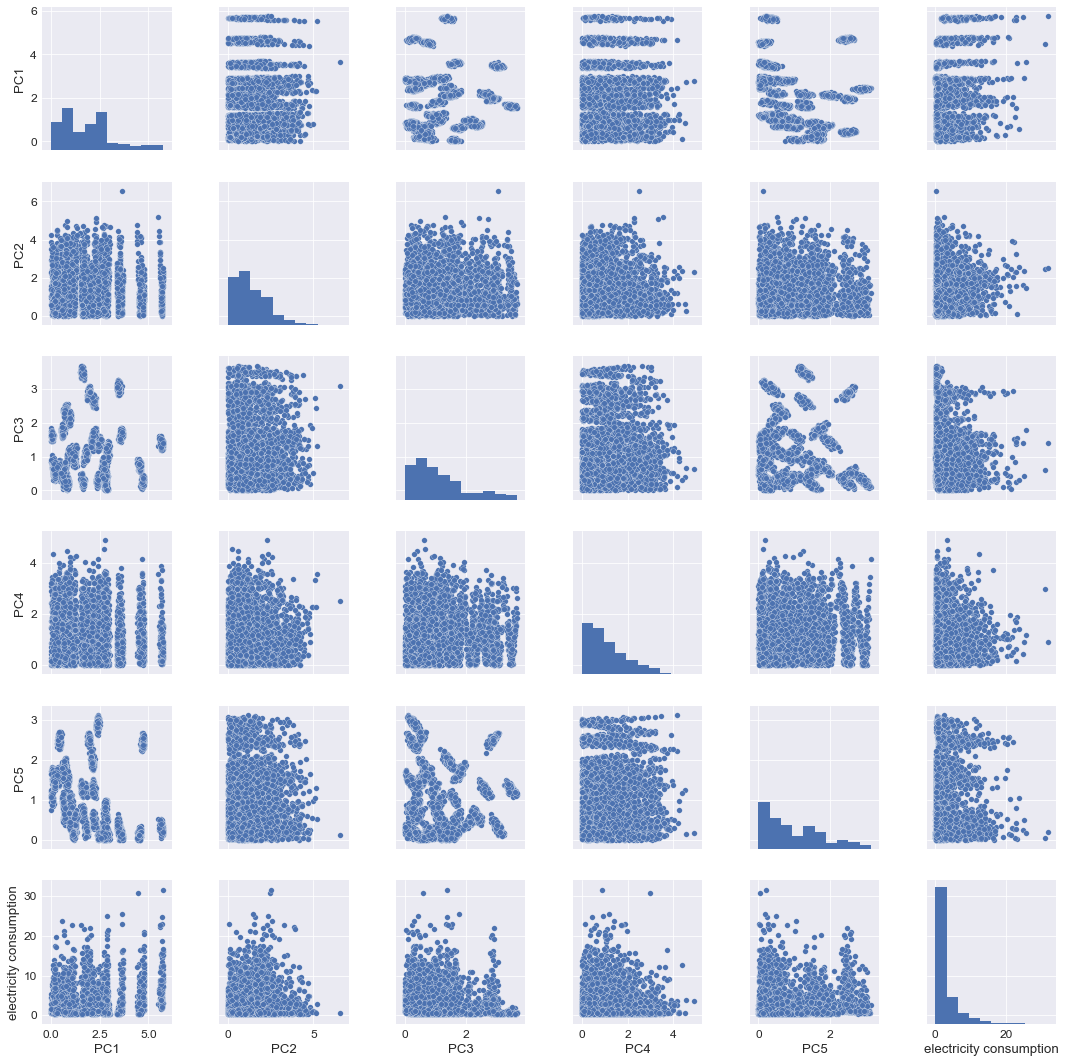

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

sns.set_context("paper",font_scale=1.5)

sns.pairplot(plot_pca, size=2.5)

plt.tight_layout()

plt.savefig('figures/scatter_PCA.jpeg', dpi=300)

plt.show()